## Working with Maidenhead in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/17_maidenhead.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/17_maidenhead.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/17_maidenhead.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/17_maidenhead.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2maidenhead

In [2]:
from vgrid.conversion.latlon2dggs import latlon2maidenhead

lat = 10.775276
lon = 106.706797
res = 3
maidenhead_id = latlon2maidenhead(lat, lon, res)
maidenhead_id

'OK30is'

### Maidenhead to Polygon

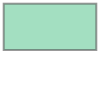

In [3]:
from vgrid.conversion.dggs2geo.maidenhead2geo import maidenhead2geo

maidenhead_geo = maidenhead2geo(maidenhead_id)
maidenhead_geo

### Maidenhead to GeoJSON        

In [ ]:
from vgrid.conversion.dggs2geo.maidenhead2geo import maidenhead2geojson

maidenhead_geojson = maidenhead2geojson(maidenhead_id)
# maidenhead_geojson

### Maidenhead Generator

Generating Maidenhead DGGS:  93%|█████████▎| 30039/32400 [00:07<00:00, 2848.99 cells/s] 

Generating Maidenhead DGGS: 100%|██████████| 32400/32400 [00:09<00:00, 3506.94 cells/s]


<Axes: >

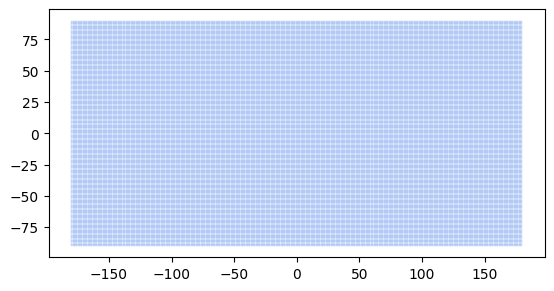

In [5]:
from vgrid.generator.maidenheadgrid import maidenheadgrid

maidenhead_grid = maidenheadgrid(resolution=2, output_format="gpd")
# maidenhead_grid = maidenheadgrid(resolution=3,bbox=[102.14,7.69,114.86,23.39],output_format="gpd")
maidenhead_grid.plot(edgecolor="#3474eb", facecolor="none", linewidth=0.1)

### Maidenhead Inspect

In [1]:
from vgrid.stats.maidenheadstats import maidenheadinspect

resolution = 2
maidenhead_inspect = maidenheadinspect(resolution)
maidenhead_inspect.head()

Generating Maidenhead DGGS: 100%|██████████| 32400/32400 [00:02<00:00, 14660.20 cells/s]


maidenhead  resolution  center_lat  center_lon    cell_width    cell_height  \
0       AA00           2       -89.5      -179.0      0.000000  111693.864914   
1       AA01           2       -88.5      -179.0   3898.455585  111693.177216   
2       AA02           2       -87.5      -179.0   7795.700029  111691.802680   
3       AA03           2       -86.5      -179.0  11690.522628  111689.743022   
4       AA04           2       -85.5      -179.0  15581.713544  111687.000814   

      cell_area  cell_perimeter  \
0  2.176892e+08   227286.185413   
1  6.529959e+08   235080.510047   
2  1.088088e+09   242869.828017   
3  1.522823e+09   250651.722215   
4  1.957057e+09   258423.779413   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-180 -90, -178 -90, -178 -89, -180 -...    False   0.013828   
1  POLYGON ((-180 -89, -178 -89, -178 -88, -180 -...    False   0.041479   
2  POLYGON ((-180 -88, -178 -88, -178 -87, -180 -...    False   0.069117   
3  POLYGON ((-180 -87, -178 -87, -178 -86, -180 -...    False   0.096732   
4  POLYGON ((-180 -86, -178 -86, -178 -85, -180 -...    False   0.124315   

        ipq       zsc  cvh  
0  0.052954  0.230118  1.0  
1  0.148487  0.385339  1.0  
2  0.231807  0.481463  1.0  
3  0.304592  0.551897  1.0  
4  0.368255  0.606839  1.0

### Maidenhead Normalized Area Histogram

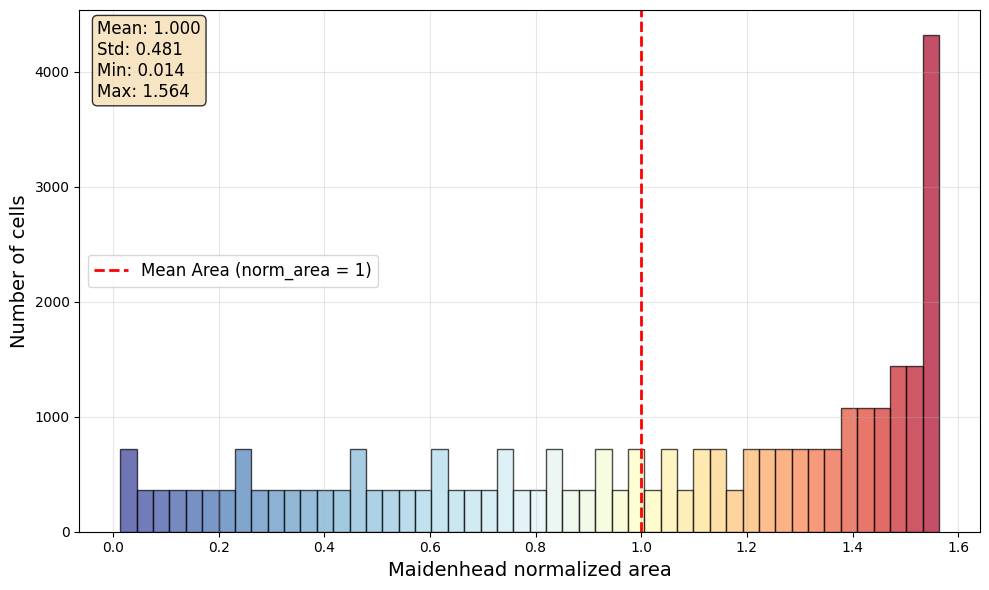

In [2]:
from vgrid.stats.maidenheadstats import maidenhead_norm_area_hist

maidenhead_norm_area_hist(maidenhead_inspect)

### Distribution of Maidenhead Area Distortions

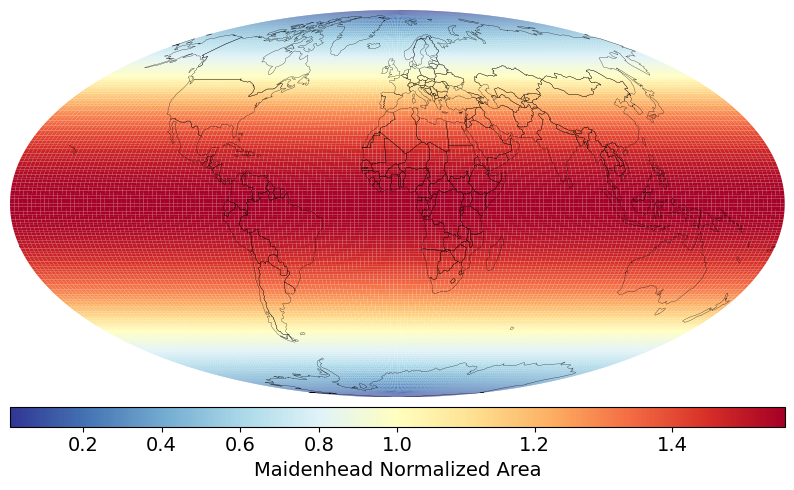

In [3]:
from vgrid.stats.maidenheadstats import maidenhead_norm_area

maidenhead_norm_area(maidenhead_inspect)

### Maidenhead IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.

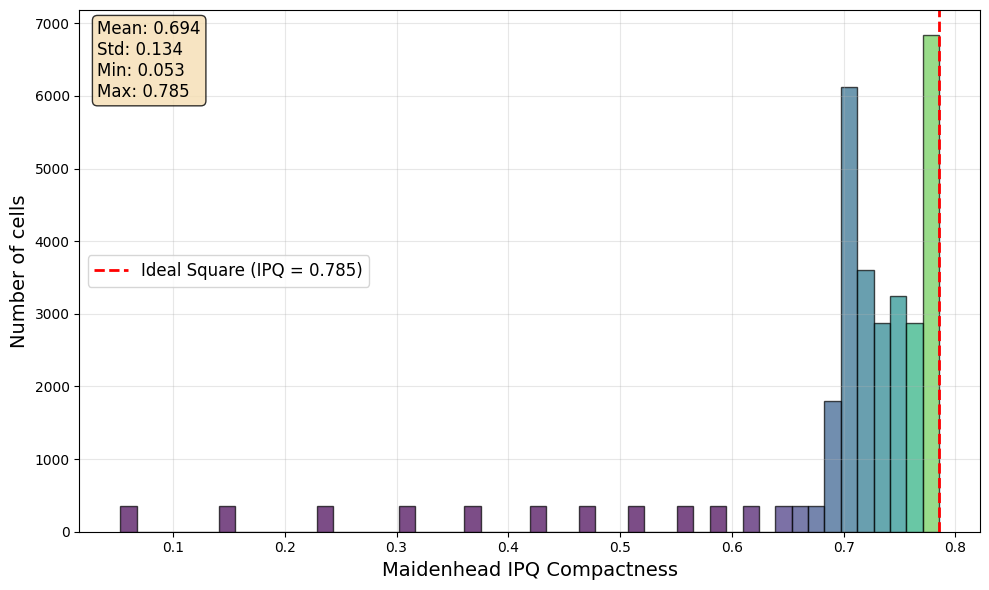

In [4]:
from vgrid.stats.maidenheadstats import maidenhead_compactness_ipq_hist

maidenhead_compactness_ipq_hist(maidenhead_inspect)

### Distribution of Maidenhead IPQ Compactness

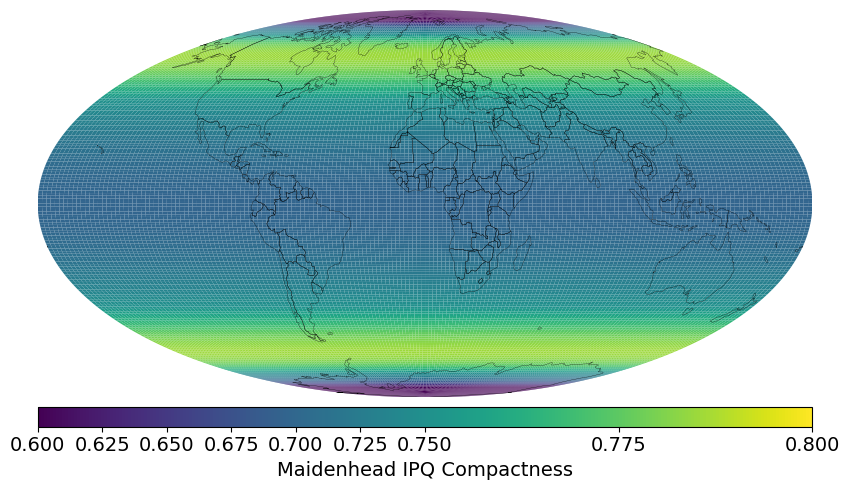

In [7]:
from vgrid.stats.maidenheadstats import maidenhead_compactness_ipq

maidenhead_compactness_ipq(maidenhead_inspect)

### Maidenhead Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

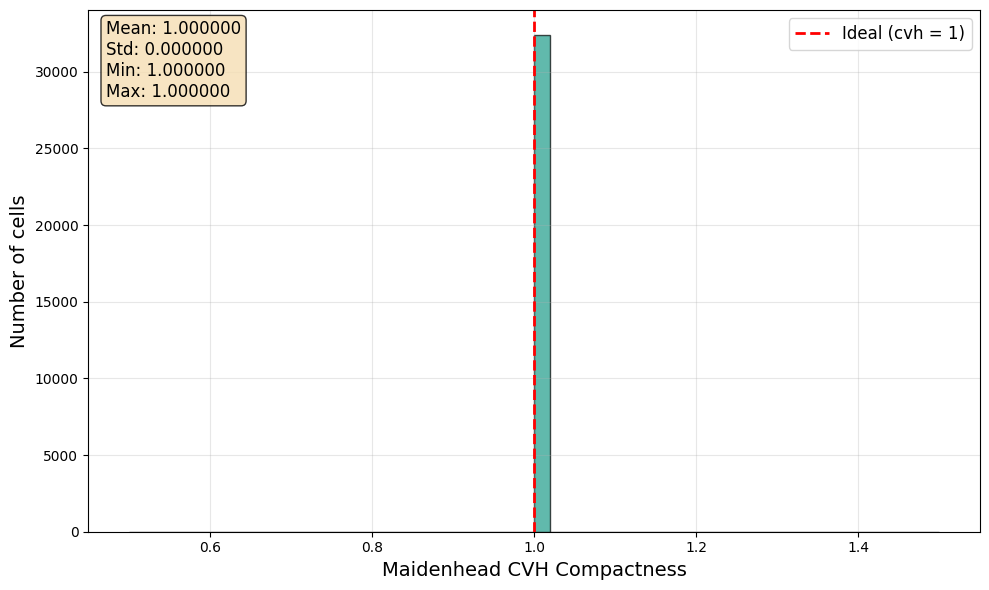

In [8]:
from vgrid.stats.maidenheadstats import maidenhead_compactness_cvh_hist

maidenhead_compactness_cvh_hist(maidenhead_inspect)

### Distribution of Maidenhaed Convex hull Compactness

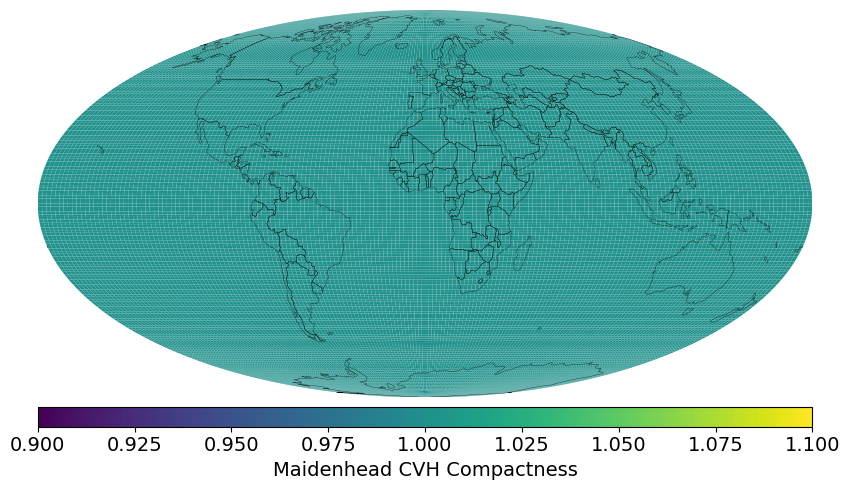

In [9]:
from vgrid.stats.maidenheadstats import maidenhead_compactness_cvh

maidenhead_compactness_cvh(maidenhead_inspect)

### Maidenhead Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [2]:
from vgrid.stats import maidenheadstats

maidenheadstats("km")

resolution  number_of_cells  avg_edge_len_km  avg_cell_area_km2  \
0           1              324      1254.701801       1.574277e+06   
1           2            32400       125.470180       1.574277e+04   
2           3         18662400         5.227924       2.733119e+01   
3           4       1866240000         0.522792       2.733119e-01   

        cls_km  
0  1416.508668  
1   141.578666  
2     5.899081  
3     0.589908